<h1 style="text-align:center;">  EXPLORATORY DATA ANALYSIS PROJECT </h1>

####  Extracting Data From The Flipkart Website

In [4]:
import numpy as np      # importing numpy
import pandas as pd     # importing pandas
import requests
from bs4 import BeautifulSoup  # from version bs4 importing BeautifulSoup
import re               # importing regular expressions

In [5]:
url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=e2bb3706-28fd-424a-9fd9-53b1503e09f1&page=1"
response = requests.get(url)  # requesting response

In [6]:
print(url)      # printing url

https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=e2bb3706-28fd-424a-9fd9-53b1503e09f1&page=1


In [7]:
print(response) # checking response

<Response [200]>


In [9]:
soup = BeautifulSoup(response.text,'lxml') # Parsing the HTML content of the response using BeautifulSoup with lxml parser

In [11]:
page = BeautifulSoup(response.text) # Parsing the HTML content of the response using BeautifulSoup with the default parser

In [16]:
# to extract discount for laptops
lst = []
for i in range(1,40):
    url = f"https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=e2bb3706-28fd-424a-9fd9-53b1503e09f1&page={i}"
    response = requests.get(url)
    page = BeautifulSoup(response.text)
    res = page.find_all("div" , class_ = "UkUFwK") 
    for i in range(24):
        lst.append(res[i].text)

In [15]:
len(lst)# finding the length of discounts column

936

In [12]:
brand = []         # creating empty list as brand
ram=[]             #  creating empty list as ram
rom= []            # creating empty list as rom
model=[]           # creating empty list as model
selling_price =[]  # creating empty list as selling_price
display=[]         # creating empty list as display
discount =[]       # creating empty list as discount

for i in range(1,40):
    url= f"https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=e2bb3706-28fd-424a-9fd9-53b1503e09f1&page={i}"
    response = requests.get(url)
    page = BeautifulSoup(response.text)
    for i in page.find_all("div",class_="KzDlHZ"): # Iterating through all "div" elements with class "KzDlHZ" and extracting the brand name if it matches the pattern
        if re.findall(r"^\w+",i.text):
            brand.append("".join(re.findall(r"^\w+",i.text)))  # Appending brand name if matched
        else: 
            brand.append(np.nan) # Appending NaN if no match found
            
        if re.findall(r"\((\d+\sGB|TB)",i.text):
            ram.append("".join(re.findall(r"\((\d+\sGB|TB)",i.text)))  # Appending ram if matched
        else:
            ram.append(np.nan) # Appending NaN if no match found
        
        if re.findall(r"\/(\d+\sGB|TB)\sSSD",i.text):
            rom.append("".join(re.findall(r"\/(\d+\sGB|TB)\sSSD",i.text)))  # Appending rom if matched
        else:
            rom.append(np.nan) # Appending NaN if no match found



    

    for i in page.find_all("div",class_="KzDlHZ"):# Iterating through all "div" elements with class "KzDlHZ" and extracting the model if it matches the pattern
        if re.findall(r"^\w+\s(\w+)",i.text):
            model.append("".join(re.findall(r"^\w+\s(\w+)",i.text)))  # Appending brand name if matched
        else:
            model.append(np.nan) # Appending NaN if no match found
            
    for i in page.find_all("div",class_="col col-5-12 BfVC2z"):
        if re.findall(r"₹(\d{1,3}(?:,\d{3})*(?:\.\d+)?(?=\D))₹",i.text):
            selling_price.append("".join(re.findall(r"₹(\d{1,3}(?:,\d{3})*(?:\.\d+)?(?=\D))₹",i.text)))  # Appending selling_price if matched
        else:
            selling_price.append(np.nan) # Appending NaN if no match found
            
    for i in page.find_all("li",class_="J+igdf"):
        if re.findall(r"\((\d.+)\s[i|I]",i.text):
            display.append("".join(re.findall(r"\((\d.+)\s[i|I]",i.text)))  # Appending display if matched

    for i in page.find_all("div",class_="UkUFwK"): 
        if re.findall(r"(\d{1,3})% off",i.text):
            discount.append("".join(re.findall(r"(\d{1,3})% off",i.text)))  # Appending discount if matched
    

In [18]:
len(brand),len(ram),len(rom),len(model),len(display),len(selling_price),len(lst) # finding lengths of all columns

(936, 936, 936, 936, 936, 936, 936)

In [66]:
df = pd.DataFrame({'brand' :brand, # creating DataFrame
'ram':ram,
'rom':rom,
'model':model,
'selling_price':selling_price,
'discount':lst,
'display':display
                  })

In [19]:
df = pd.read_csv(r"C:\Users\rakes\EDA PROJECT.csv")

In [20]:
df

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8 GB,512 GB,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16 GB,512 GB,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16 GB,512 GB,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8 GB,512 GB,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16 GB,512 GB,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16 GB,512 GB,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16 GB,512 GB,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16 GB,512 GB,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8 GB,512 GB,Intel,"46,990",26% off,15.6,5.0


In [21]:
# storing the data into different variable
df1 = df

In [22]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8 GB,512 GB,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16 GB,512 GB,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16 GB,512 GB,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8 GB,512 GB,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16 GB,512 GB,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16 GB,512 GB,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16 GB,512 GB,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16 GB,512 GB,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8 GB,512 GB,Intel,"46,990",26% off,15.6,5.0


In [23]:
new = df1['ram'].mode()[0] #finding the mode of ram 

In [24]:
 df1.loc[df1['ram'].isnull(),['ram']] = new

In [25]:
new

'16 GB'

In [26]:
df1['ram'] = df1['ram'].replace(r'GB', '', regex=True) # removing gb / tb in ram column 

In [27]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8,512 GB,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16,512 GB,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16,512 GB,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8,512 GB,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16,512 GB,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16,512 GB,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16,512 GB,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16,512 GB,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8,512 GB,Intel,"46,990",26% off,15.6,5.0


In [28]:
df1['rom'] = df1['rom'].replace(r'GB', '', regex=True) # removing gb / tb in rom column 

In [29]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8,512,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16,512,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16,512,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8,512,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16,512,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16,512,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16,512,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16,512,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8,512,Intel,"46,990",26% off,15.6,5.0


In [30]:
df1['ram'] = df1['ram'].str.strip()

In [31]:
df1['ram'] = df1['ram'].astype('int') # changing the dtype of column ram

In [32]:
new1 = df1['rom'].mode()[0]

In [33]:
 df1.loc[df1['rom'].isnull(),['rom']] = new1 #finding the mode of rom table

In [34]:
df1['rom'] = df1['rom'].str.strip() # changing the dtype of column rom

In [35]:
df1['rom']=df1['rom'].astype('int')

In [36]:
# assigning dtypes to the data frame
#df1.astype({'ram': 'int', 'rom': 'int', 'display': 'float','model':'str','rating':'float','selling_price':'int','discount':'int'})

In [37]:
#df1['selling_price'] = df1['selling_price'].astype('int')

In [38]:
df1['discount'] = df1['discount'].replace(r'%off', '', regex=True) # removing "% off" from the discount column

In [39]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8,512,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16,512,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16,512,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8,512,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16,512,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16,512,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16,512,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16,512,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8,512,Intel,"46,990",26% off,15.6,5.0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     936 non-null    int64  
 1   brand          936 non-null    object 
 2   ram            936 non-null    int32  
 3   rom            936 non-null    int32  
 4   model          932 non-null    object 
 5   selling_price  738 non-null    object 
 6   discount       936 non-null    object 
 7   display        936 non-null    float64
 8   rating         936 non-null    float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 58.6+ KB


In [41]:
df1['model'].isnull().sum() # we are finding null values in model column

4

In [42]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8,512,Vostro,"44,990",30% off,15.6,4.2
1,1,DELL,16,512,Vostro,"49,990",28% off,15.6,3.8
2,2,HP,16,512,Intel,"46,990",60% off,15.6,4.1
3,3,SAMSUNG,8,512,Galaxy,"39,990",47% off,15.6,3.8
4,4,Lenovo,16,512,IdeaPad,"40,990",37% off,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16,512,Cyborg,"56,990",26% off,15.6,5.0
932,932,ASUS,16,512,Vivobook,"80,990",28% off,15.6,4.0
933,933,MSI,16,512,Commercial,"87,990",26% off,14.0,4.2
934,934,Lenovo,8,512,Intel,"46,990",26% off,15.6,5.0


In [43]:
null_val_in_model = df1.loc[df1['model'].isna()][['brand', 'model']] # finding null values in model column along with brand

In [44]:
null_val_in_model # these are the null values in model long with brand name

,brand,model
63,HP,NaN
472,HP,NaN
671,HP,NaN
685,HP,NaN


In [45]:
df1['brand'].value_counts() # we are checking the  brand repetations in  brandcolumn 

brand
MSI          260
DELL         176
HP           129
Lenovo       116
ASUS         101
Acer          69
Apple         36
SAMSUNG       12
Infinix       11
Thomson        6
MICROSOFT      6
Ultimus        4
CHUWI          3
Avita          2
Colorful       1
WINGS          1
realme         1
AXL            1
GIGABYTE       1
Name: count, dtype: int64

In [46]:
a = df1.loc[df1['brand']=="HP",'model'].mode() # we are finding the mode of brand with name HP

In [47]:
a[0]

'15s'

In [48]:
df['model'].fillna(a[0],inplace=True) # we are filling model null values with 

C:\Users\rakes\AppData\Local\Temp\ipykernel_19320\3274216253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna(a[0],inplace=True) # we are filling model null values with


In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     936 non-null    int64  
 1   brand          936 non-null    object 
 2   ram            936 non-null    int32  
 3   rom            936 non-null    int32  
 4   model          936 non-null    object 
 5   selling_price  738 non-null    object 
 6   discount       936 non-null    object 
 7   display        936 non-null    float64
 8   rating         936 non-null    float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 58.6+ KB


In [98]:
df1['selling_price'].isna().sum()# these many null values are present in selling_price column

198

In [99]:
null_val_in_selling_price = df1.loc[df1['selling_price'].isna()][['brand', 'selling_price']] # finding null values in selling price along with brand

In [100]:
null_val_in_selling_price

,brand,selling_price
11,MSI,NaN
17,MSI,NaN
18,Apple,NaN
31,MSI,NaN
37,MSI,NaN
...,...,...
911,MSI,NaN
915,Acer,NaN
926,MSI,NaN
929,Apple,NaN


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     936 non-null    int64  
 1   brand          936 non-null    object 
 2   ram            936 non-null    int32  
 3   rom            936 non-null    int32  
 4   model          936 non-null    object 
 5   selling_price  738 non-null    object 
 6   discount       936 non-null    object 
 7   display        936 non-null    float64
 8   rating         936 non-null    float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 58.6+ KB


In [112]:
df1['selling_price'] = df1['selling_price'].fillna(0) # filling nan values with 0 in selling_price column

In [118]:
df1['selling_price'] = df1['selling_price'].replace({',': ''}, regex=True) # we are removing ',' in sellin price column

In [119]:
df1['selling_price']=df1['selling_price'].astype('int') # we are assigning the data type of selling price column

In [125]:
df1['selling_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 936 entries, 0 to 935
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
936 non-null    int32
dtypes: int32(1)
memory usage: 3.8 KB


In [122]:
avg_price_by_brand = df1.groupby('brand')['selling_price'].mean() # this is the average price of selling price of each brand

In [123]:
avg_price_by_brand

brand
ASUS         45350.396040
AXL          16990.000000
Acer         32061.420290
Apple        17498.055556
Avita        28990.000000
CHUWI        27990.000000
Colorful     45990.000000
DELL         46582.960227
GIGABYTE     86990.000000
HP           42109.852713
Infinix      41648.545455
Lenovo       48278.086207
MICROSOFT    33330.000000
MSI          39644.346154
SAMSUNG      43663.166667
Thomson      25573.333333
Ultimus      19490.000000
WINGS        46990.000000
realme       64999.000000
Name: selling_price, dtype: float64

In [140]:
# Find the mean of selling_price for each brand excluding rows with 0
mean_selling_price = df1[df1['selling_price'] != 0].groupby('brand')['selling_price'].mean()

In [141]:
mean_selling_price

brand
ASUS         51465.056180
AXL          16990.000000
Acer         40967.370370
Apple        89990.000000
Avita        28990.000000
CHUWI        27990.000000
Colorful     45990.000000
DELL         46849.148571
GIGABYTE     86990.000000
HP           44893.975207
Infinix      50903.777778
Lenovo       52338.859813
MICROSOFT    99990.000000
MSI          70599.520548
SAMSUNG      65494.750000
Thomson      25573.333333
Ultimus      19490.000000
WINGS        46990.000000
realme       64999.000000
Name: selling_price, dtype: float64

In [139]:
#  Filling 0 values in selling_price with the respective brand mean selling price
df1['selling_price'] = df1.apply(
    lambda x: mean_selling_price[x['brand']] if x['selling_price'] == 0 else x['selling_price'], axis=1
)

In [142]:
df1['selling_price']

0      44990.0
1      49990.0
2      46990.0
3      39990.0
4      40990.0
        ...   
931    56990.0
932    80990.0
933    87990.0
934    46990.0
935    99990.0
Name: selling_price, Length: 936, dtype: float64

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     936 non-null    int64  
 1   brand          936 non-null    object 
 2   ram            936 non-null    int32  
 3   rom            936 non-null    int32  
 4   model          936 non-null    object 
 5   selling_price  936 non-null    float64
 6   discount       936 non-null    object 
 7   display        936 non-null    float64
 8   rating         936 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 58.6+ KB


In [144]:
df1

,Unnamed: 0,brand,ram,rom,model,selling_price,discount,display,rating
0,0,DELL,8,512,Vostro,44990.0,30%,15.6,4.2
1,1,DELL,16,512,Vostro,49990.0,28%,15.6,3.8
2,2,HP,16,512,Intel,46990.0,60%,15.6,4.1
3,3,SAMSUNG,8,512,Galaxy,39990.0,47%,15.6,3.8
4,4,Lenovo,16,512,IdeaPad,40990.0,37%,15.6,4.2
...,...,...,...,...,...,...,...,...,...
931,931,MSI,16,512,Cyborg,56990.0,26%,15.6,5.0
932,932,ASUS,16,512,Vivobook,80990.0,28%,15.6,4.0
933,933,MSI,16,512,Commercial,87990.0,26%,14.0,4.2
934,934,Lenovo,8,512,Intel,46990.0,26%,15.6,5.0


In [166]:
df1.drop(columns ='Unnamed: 0',inplace = True) # we are permanently dropping that unnamed  column

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     936 non-null    int64  
 1   brand          936 non-null    object 
 2   ram            936 non-null    int32  
 3   rom            936 non-null    int32  
 4   model          936 non-null    object 
 5   selling_price  936 non-null    float64
 6   discount       936 non-null    object 
 7   display        936 non-null    float64
 8   rating         936 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 58.6+ KB


In [157]:
df1['discount'] # so we are removing %symbol which is present in discount column

0      30%
1      28%
2      60%
3      47%
4      37%
      ... 
931    26%
932    28%
933    26%
934    26%
935    36%
Name: discount, Length: 936, dtype: object

In [163]:
df1['discount'] = df1['discount'].replace('%', '', regex=True) # by this we can replace that % symbol as empty string


In [167]:
df1

,brand,ram,rom,model,selling_price,discount,display,rating
0,DELL,8,512,Vostro,44990.0,30,15.6,4.2
1,DELL,16,512,Vostro,49990.0,28,15.6,3.8
2,HP,16,512,Intel,46990.0,60,15.6,4.1
3,SAMSUNG,8,512,Galaxy,39990.0,47,15.6,3.8
4,Lenovo,16,512,IdeaPad,40990.0,37,15.6,4.2
...,...,...,...,...,...,...,...,...
931,MSI,16,512,Cyborg,56990.0,26,15.6,5.0
932,ASUS,16,512,Vivobook,80990.0,28,15.6,4.0
933,MSI,16,512,Commercial,87990.0,26,14.0,4.2
934,Lenovo,8,512,Intel,46990.0,26,15.6,5.0


In [170]:
df1['discount'] = df1['discount'].astype('int') # we are assigning int datatype for discount column

In [172]:
# we are generating new column by using discount and selling price columns

In [173]:
df1['original_price'] = df1['selling_price'] / (1 - df1['discount']/100)

In [174]:
df1

,brand,ram,rom,model,selling_price,discount,display,rating,original_price
0,DELL,8,512,Vostro,44990.0,30,15.6,4.2,64271.428571
1,DELL,16,512,Vostro,49990.0,28,15.6,3.8,69430.555556
2,HP,16,512,Intel,46990.0,60,15.6,4.1,117475.000000
3,SAMSUNG,8,512,Galaxy,39990.0,47,15.6,3.8,75452.830189
4,Lenovo,16,512,IdeaPad,40990.0,37,15.6,4.2,65063.492063
...,...,...,...,...,...,...,...,...,...
931,MSI,16,512,Cyborg,56990.0,26,15.6,5.0,77013.513514
932,ASUS,16,512,Vivobook,80990.0,28,15.6,4.0,112486.111111
933,MSI,16,512,Commercial,87990.0,26,14.0,4.2,118905.405405
934,Lenovo,8,512,Intel,46990.0,26,15.6,5.0,63500.000000


In [177]:
df1 = df1[['brand','model','display','ram','rom','original_price','discount','selling_price','rating']]  # we are re arranging the columns as we need

In [180]:
df1

,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...
931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           936 non-null    object 
 1   model           936 non-null    object 
 2   display         936 non-null    float64
 3   ram             936 non-null    int32  
 4   rom             936 non-null    int32  
 5   original_price  936 non-null    float64
 6   discount        936 non-null    int32  
 7   selling_price   936 non-null    float64
 8   rating          936 non-null    float64
dtypes: float64(4), int32(3), object(2)
memory usage: 55.0+ KB


In [186]:
df1

,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...
931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


In [187]:
df1.to_csv("LAPTOPS_DATA_Cleaned") # we have send the df1 data to a csv file


In [185]:
df1

,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...
931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


In [3]:
df_lp = pd.read_csv(r"C:\Users\rakes\LAPTOPS_DATA_Cleaned")

In [4]:
df_lp

,Unnamed: 0,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...,...
931,931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


In [5]:
df_lp.drop(columns ='Unnamed: 0',inplace = True)

In [6]:
df_lp

,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...
931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


## Performing Exploratory Data Analysis on Data set

In [7]:
df_lp

,brand,model,display,ram,rom,original_price,discount,selling_price,rating
0,DELL,Vostro,15.6,8,512,64271.428571,30,44990.0,4.2
1,DELL,Vostro,15.6,16,512,69430.555556,28,49990.0,3.8
2,HP,Intel,15.6,16,512,117475.000000,60,46990.0,4.1
3,SAMSUNG,Galaxy,15.6,8,512,75452.830189,47,39990.0,3.8
4,Lenovo,IdeaPad,15.6,16,512,65063.492063,37,40990.0,4.2
...,...,...,...,...,...,...,...,...,...
931,MSI,Cyborg,15.6,16,512,77013.513514,26,56990.0,5.0
932,ASUS,Vivobook,15.6,16,512,112486.111111,28,80990.0,4.0
933,MSI,Commercial,14.0,16,512,118905.405405,26,87990.0,4.2
934,Lenovo,Intel,15.6,8,512,63500.000000,26,46990.0,5.0


In [15]:
import pandas as pd
import seaborn as sns # we are importing seaborn 
import matplotlib.pyplot as plt # we are importing matplotlib.pyplot

Text(0.5, 1.0, 'Distribution of Original Price')

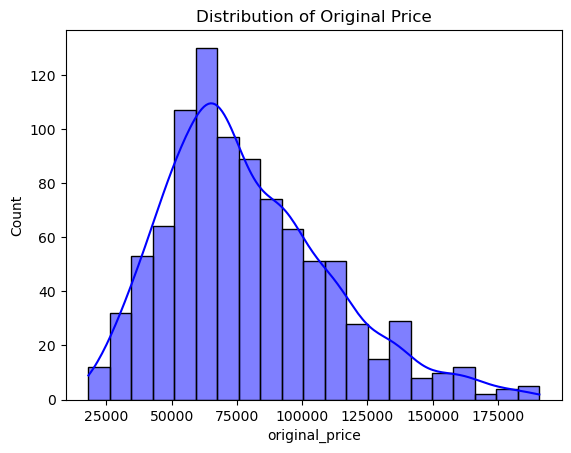

In [279]:
# we are seeing the price discribution among laptops
sns.histplot(df_lp['original_price'],kde=True,color='blue')
plt.title('Distribution of Original Price')

##### so there are more number of laptops  in market of price ranging from 50,000 - 70,000

C:\Users\rakes\AppData\Local\Temp\ipykernel_15724\453560536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_lp, x='brand', y='discount', estimator='mean',errorbar=None, palette='Set2')


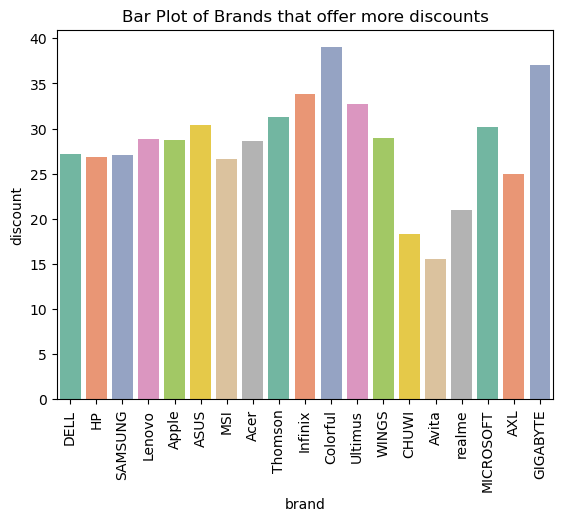

In [283]:
sns.barplot(data=df_lp, x='brand', y='discount', estimator='mean',errorbar=None, palette='Set2')
plt.title('Bar Plot of Brands that offer more discounts')
plt.xticks(rotation=90) 
plt.show() 

##### Colorful Brand offers more discounts to customers as compared to other brands

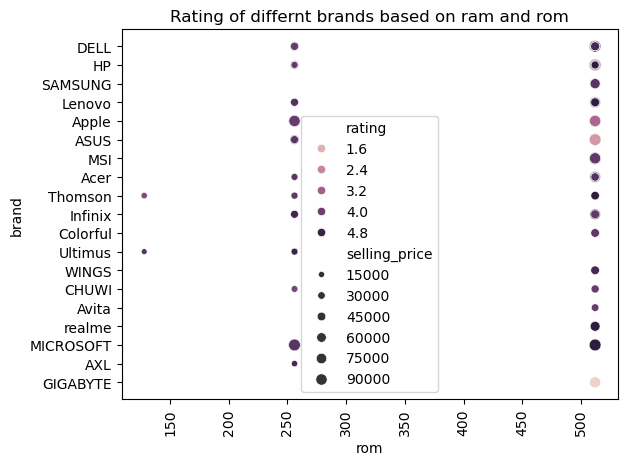

In [297]:
figsize=(1,1,1)
sns.scatterplot(data = df_lp,x='rom',y='brand',hue='rating',size='selling_price')
plt.title('Rating of differnt brands based on ram and rom')
plt.xticks(rotation = 90)
plt.show()

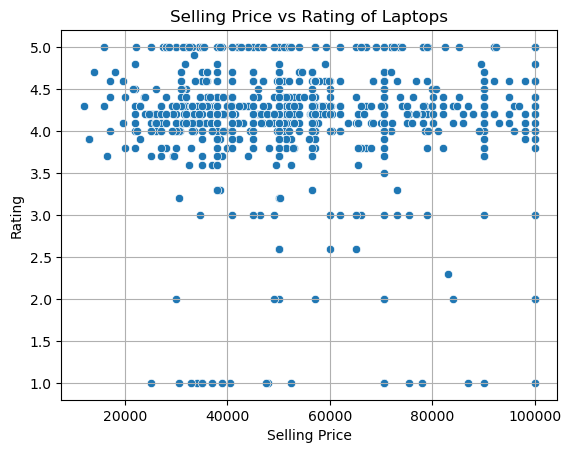

In [31]:
sns.scatterplot(data = df_lp, x = 'selling_price',y ='rating')

plt.title('Selling Price vs Rating of Laptops')
plt.xlabel('Selling Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


##### most of the good rating laptops are in price range of 40,000-60,000